 - **EntitySet**: 여러 개의 엔티티(데이터프레임)를 관리하는 객체입니다. 이를 통해 데이터 간의 관계를 정의하고, 피처 엔지니어링을 위한 기초를 마련합니다.
     - `EntitySet()`을 사용해 새로운 EntitySet을 생성.
     - `add_dataframe()`: EntitySet에 데이터프레임을 추가.
     - `normalize_dataframe()`: 데이터프레임을 정규화하여 새로운 엔티티를 생성하고, 자동으로 관계를 설정.


- **Relationships**: 서로 다른 엔티티 간의 부모-자식 관계를 정의합니다.
     - `add_relationship()`: 두 엔티티 간의 관계를 정의하고 EntitySet에 추가.

- **DFS**: 주어진 엔티티셋(EntitySet)과 관계를 기반으로 피처를 자동으로 생성하는 핵심 기능.
     - `ft.dfs()`: 자동 피처 생성 함수로, 다양한 설정을 통해 피처를 생성.
     - 주요 하이퍼파라미터:
       - `entityset`: DFS를 적용할 엔티티셋.
       - `target_dataframe_name`: 피처를 생성할 타겟 엔티티.
       - `max_depth`: 생성할 피처의 복잡성(깊이)를 설정.
       - `agg_primitives`: 집계 프리미티브(예: `sum`, `mean` 등)를 지정.
       - `trans_primitives`: 변환 프리미티브(예: `day`, `month`, `divide` 등)를 지정.

### 1. **기본 제공 프리미티브**

`FeatureTools`는 다양한 기본 제공 프리미티브를 제공합니다. 이들은 변환과 집계 작업에 사용될 수 있습니다.

#### **변환 프리미티브 (Transformation Primitives)**
변환 프리미티브는 데이터의 개별 행에 대해 변환 작업을 수행합니다.

- **Math Operations**:
  - `Absolute`: 절대값을 반환합니다.
  - `AddNumeric`: 두 숫자를 더합니다.
  - `SubtractNumeric`: 두 숫자를 뺍니다.
  - `MultiplyNumeric`: 두 숫자를 곱합니다.
  - `DivideNumeric`: 두 숫자를 나눕니다.

- **Datetime Transformations**:
  - `Year`: 날짜에서 연도를 추출합니다.
  - `Month`: 날짜에서 월을 추출합니다.
  - `Day`: 날짜에서 일을 추출합니다.
  - `Hour`: 시간에서 시각을 추출합니다.
  - `DayOfWeek`: 날짜에서 요일을 추출합니다.
  - `IsWeekend`: 날짜가 주말인지 여부를 반환합니다.

- **Text Transformations**:
  - `Upper`: 텍스트를 모두 대문자로 변환합니다.
  - `Lower`: 텍스트를 모두 소문자로 변환합니다.
  - `Len`: 텍스트의 길이를 반환합니다.

- **Other Transformations**:
  - `IsNull`: 값이 null인지 확인합니다.
  - `Not`: 논리 NOT 연산을 수행합니다.
  - `Percentile`: 값의 백분위를 반환합니다.

#### **집계 프리미티브 (Aggregation Primitives)**
집계 프리미티브는 그룹화된 데이터에서 요약 통계를 생성합니다.

- **Statistical Aggregations**:
  - `Sum`: 합계를 계산합니다.
  - `Mean`: 평균을 계산합니다.
  - `Min`: 최소값을 반환합니다.
  - `Max`: 최대값을 반환합니다.
  - `Std`: 표준 편차를 계산합니다.
  - `Count`: 개수를 계산합니다.
  - `Median`: 중위수를 계산합니다.
  - `Mode`: 최빈값을 반환합니다.

- **Time-based Aggregations**:
  - `TimeSinceLast`: 마지막 발생 이후 경과 시간을 계산합니다.
  - `TimeSinceFirst`: 첫 발생 이후 경과 시간을 계산합니다.

- **Custom Aggregations**:
  - `NumUnique`: 고유 값의 수를 계산합니다.
  - `NumTrue`: 참(`True`) 값의 수를 계산합니다.
  - `Any`: 하나 이상의 참(`True`) 값이 있는지 확인합니다.
  - `All`: 모든 값이 참(`True`)인지 확인합니다.


In [1]:
import featuretools as ft
import pandas as pd

- 엔티티(Entity) - 데이터베이스 RDBMS 구조
- 엔티티셋(Entityset)- 엔티티간의 관계 정의한 집합

---
- 자동으로 피처를 생성해준다.
- DFS ( Deep Feature Synthesis )
    - 데이터생성의 핵심기능
    - DFS 엔티티간의 관계를 활용해서 깊이 있는 피처를 (유의미한) 만든다.
    
---
- 프리미티브 (primitives)
- 피처 생성 함수 ( featuretools에서 어떤 함수로 피처를 만들래 ? 제공하는 함수 )
    - 변환 (Transformer Primitives) - 데이터의 변환 연도, 월, 일 등의 수치 데이터 변환
    - 집계 (Aggregation Primitives) - 요약 집계, 기초통계치 ( 평균, sum 등등 )

In [2]:
## 데이터 준비 예시 데이터

#고객 테이블
customer_df = pd.DataFrame({
    'customer_id' : [1,2,3],
    'join_date' : ['2025-02-14','2025-04-10','2025-05-10'],
    'region':['Dajoen','Seoul','Sejong']
})


orders_df = pd.DataFrame({
    'order_id' : [1,2,3,4,5],
    'customer_id':[1,1,2,2,3],
    'order_date' : ['2024-04-10','2024-04-11','2024-04-15','2024-05-21','2024-07-05'],
    'amount':[10320,22500,28000,42500,45500]
})


In [3]:
## Entityset 생성
es =ft.EntitySet()

## 엔티티 추가
es =es.add_dataframe(dataframe_name = 'customers', dataframe=customer_df, index = 'customer_id')
es =es.add_dataframe(dataframe_name = 'orders', dataframe=orders_df, index = 'order_id')

/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


In [4]:
## 관계 설정 및 추가
relationship = es.add_relationship(
    parent_dataframe_name = 'customers',
    parent_column_name = 'customer_id',
    child_dataframe_name = 'orders',
    child_column_name = 'customer_id'
)

In [5]:
# 관계 관찰
relationship
# 엔티티별 행-열 개수와 관계 유형 파악 가능

Entityset: None
  DataFrames:
    customers [Rows: 3, Columns: 3]
    orders [Rows: 5, Columns: 4]
  Relationships:
    orders.customer_id -> customers.customer_id

In [6]:
## 자동 피처 생성
## 피처 생성의 깊이를 3까지
feature_matrix, feature_defs =ft.dfs(entityset= es, target_dataframe_name = 'customers', max_depth=3)

/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x1098b98a0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ).agg(to_agg)
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x1098b9760> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x1098b9

In [7]:
feature_matrix

,COUNT(orders),MAX(orders.amount),MEAN(orders.amount),MIN(orders.amount),SKEW(orders.amount),STD(orders.amount),SUM(orders.amount),DAY(join_date),MONTH(join_date),WEEKDAY(join_date),YEAR(join_date),MODE(orders.DAY(order_date)),MODE(orders.MONTH(order_date)),MODE(orders.WEEKDAY(order_date)),MODE(orders.YEAR(order_date)),NUM_UNIQUE(orders.DAY(order_date)),NUM_UNIQUE(orders.MONTH(order_date)),NUM_UNIQUE(orders.WEEKDAY(order_date)),NUM_UNIQUE(orders.YEAR(order_date))
customer_id,,,,,,,,,,,,,,,,,,,
1,2,22500.0,16410.0,10320.0,NaN,8612.560595,32820.0,14,2,4,2025,10,4,2,2024,2,1,2,1
2,2,42500.0,35250.0,28000.0,NaN,10253.048327,70500.0,10,4,3,2025,15,4,0,2024,2,2,2,1
3,1,45500.0,45500.0,45500.0,NaN,NaN,45500.0,10,5,5,2025,5,7,4,2024,1,1,1,1


In [9]:
## 옵션을 추가
## 자동 피처 생성
feature_matrix, feature_defs =ft.dfs(
    entityset= es, target_dataframe_name = 'customers',trans_primitives = ['Month', 'Day'] ,max_depth=2
)

/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x1098b98a0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ).agg(to_agg)
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x1098b9760> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function std at 0x1098ba

In [10]:
feature_matrix

,COUNT(orders),MAX(orders.amount),MEAN(orders.amount),MIN(orders.amount),SKEW(orders.amount),STD(orders.amount),SUM(orders.amount),DAY(join_date),MONTH(join_date),MODE(orders.DAY(order_date)),MODE(orders.MONTH(order_date)),NUM_UNIQUE(orders.DAY(order_date)),NUM_UNIQUE(orders.MONTH(order_date))
customer_id,,,,,,,,,,,,,
1,2,22500.0,16410.0,10320.0,NaN,8612.560595,32820.0,14,2,10,4,2,1
2,2,42500.0,35250.0,28000.0,NaN,10253.048327,70500.0,10,4,15,4,2,2
3,1,45500.0,45500.0,45500.0,NaN,NaN,45500.0,10,5,5,7,1,1


In [39]:
# 강릉의 장애인 콜택시 데이터 활용
df = pd.read_excel('행복콜_강릉배차내역.xlsx')
df

,일자,동승자수,접수시간,승차시간,하차시간,출발지행정동,목적지행정동,요금,결제종류,운행거리(KM)
0,2024-06-01,0,2024-06-01 00:19,00:32,00:38,포남2동,포남2동,1100,카드,1.7
1,2024-06-01,0,2024-06-01 00:35,00:48,01:02,송정동,옥천동,1200,카드,4.3
2,2024-06-01,0,2024-06-01 00:42,00:56,01:04,성덕동,중앙동,1100,카드,2.4
3,2024-06-01,0,2024-06-01 01:20,01:33,01:39,중앙동,성덕동,1100,카드,1.8
4,2024-06-01,0,2024-06-01 02:16,02:28,02:36,포남2동,성덕동,1100,카드,1.6
...,...,...,...,...,...,...,...,...,...,...
8607,2024-06-30,0,2024-06-30 21:37,22:00,22:21,교2동,내곡동,1200,카드,4.6
8608,2024-06-30,0,2024-06-30 21:47,22:28,22:41,중앙동,교1동,1100,카드,2.9
8609,2024-06-30,0,2024-06-30 21:59,22:38,22:49,송정동,포남1동,1100,카드,3.2
8610,2024-06-30,0,2024-06-30 22:49,22:59,23:15,초당동,홍제동,1500,현금,7.3


## featuretools를 활용하여 집계 피처 생성

In [40]:
df['transaction_id'] =df.index
df

,일자,동승자수,접수시간,승차시간,하차시간,출발지행정동,목적지행정동,요금,결제종류,운행거리(KM),transaction_id
0,2024-06-01,0,2024-06-01 00:19,00:32,00:38,포남2동,포남2동,1100,카드,1.7,0
1,2024-06-01,0,2024-06-01 00:35,00:48,01:02,송정동,옥천동,1200,카드,4.3,1
2,2024-06-01,0,2024-06-01 00:42,00:56,01:04,성덕동,중앙동,1100,카드,2.4,2
3,2024-06-01,0,2024-06-01 01:20,01:33,01:39,중앙동,성덕동,1100,카드,1.8,3
4,2024-06-01,0,2024-06-01 02:16,02:28,02:36,포남2동,성덕동,1100,카드,1.6,4
...,...,...,...,...,...,...,...,...,...,...,...
8607,2024-06-30,0,2024-06-30 21:37,22:00,22:21,교2동,내곡동,1200,카드,4.6,8607
8608,2024-06-30,0,2024-06-30 21:47,22:28,22:41,중앙동,교1동,1100,카드,2.9,8608
8609,2024-06-30,0,2024-06-30 21:59,22:38,22:49,송정동,포남1동,1100,카드,3.2,8609
8610,2024-06-30,0,2024-06-30 22:49,22:59,23:15,초당동,홍제동,1500,현금,7.3,8610


In [41]:
## Entityset 생성
es =ft.EntitySet()

# 엔티티 추가 
es =es.add_dataframe(dataframe_name='transactions', dataframe=df, index='transaction_id', time_index='일자')

# 기존에 있는 df에서 출발지 엔티티를 추가
es =es.normalize_dataframe(base_dataframe_name='transactions',new_dataframe_name='start', index='출발지행정동')

/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/woodwork/logical_types.py:346: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.to_datetime(
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.1

In [42]:
## 변환, 집계 프리미티브 추가
feature_matrix, feature_defs = ft.dfs(
    entityset= es
    ,target_dataframe_name = 'start'
    ,agg_primitives = ["sum",'mean','count','median']
    ,trans_primitives = ['Year', 'Month','day'] 
    ,max_depth=2)

/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x1098ba160> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ).agg(to_agg)
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x1098b9080> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg(to_agg)
/Users/gimhongjae/anaconda3/envs/PythonPractice/lib/python3.11/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x10

In [43]:
from sklearn.feature_selection import VarianceThreshold

## y의 값을 하나를 지정해서 -> 유의미한 피처들이 무엇이 있는지? 찾아보자!
target_variable = 'COUNT(transactions)'

## 피처를 셀렉션
## 상관계수, 분산 기반

corr_matrix =feature_matrix.corr()
target_corr = corr_matrix[target_variable]

## 임계값 설정해서 피처 선정
selected_by_corr =target_corr[abs(target_corr)>0.1].index

### 분산
selector = VarianceThreshold(threshold=0.1)
selected_by_variacne=feature_matrix.columns[selector.fit(feature_matrix).get_support()]

In [44]:
target_corr

COUNT(transactions)               1.000000
MEAN(transactions.동승자수)          -0.156436
MEAN(transactions.요금)            -0.503260
MEAN(transactions.운행거리(KM))      -0.515265
MEDIAN(transactions.동승자수)              NaN
MEDIAN(transactions.요금)          -0.523224
MEDIAN(transactions.운행거리(KM))    -0.516148
SUM(transactions.동승자수)            0.514281
SUM(transactions.요금)              0.975555
SUM(transactions.운행거리(KM))        0.851433
DAY(first_transactions_time)     -0.543199
MONTH(first_transactions_time)         NaN
YEAR(first_transactions_time)          NaN
Name: COUNT(transactions), dtype: float64

In [45]:
selected_by_corr

Index(['COUNT(transactions)', 'MEAN(transactions.동승자수)',
       'MEAN(transactions.요금)', 'MEAN(transactions.운행거리(KM))',
       'MEDIAN(transactions.요금)', 'MEDIAN(transactions.운행거리(KM))',
       'SUM(transactions.동승자수)', 'SUM(transactions.요금)',
       'SUM(transactions.운행거리(KM))', 'DAY(first_transactions_time)'],
      dtype='object')

In [46]:
selected_by_variacne

Index(['COUNT(transactions)', 'MEAN(transactions.요금)',
       'MEAN(transactions.운행거리(KM))', 'MEDIAN(transactions.요금)',
       'MEDIAN(transactions.운행거리(KM))', 'SUM(transactions.동승자수)',
       'SUM(transactions.요금)', 'SUM(transactions.운행거리(KM))',
       'DAY(first_transactions_time)'],
      dtype='object')

In [47]:
## 공통된 피처만 선정하자

selected_feature_by_corr = set(['COUNT(transactions)', 'MEAN(transactions.동승자수)',
       'MEAN(transactions.요금)', 'MEAN(transactions.운행거리(KM))',
       'MEDIAN(transactions.요금)', 'MEDIAN(transactions.운행거리(KM))',
       'SUM(transactions.동승자수)', 'SUM(transactions.요금)',
       'SUM(transactions.운행거리(KM))', 'DAY(first_transactions_time)'])

selected_feature_by_variance = set(['COUNT(transactions)', 'MEAN(transactions.요금)',
       'MEAN(transactions.운행거리(KM))', 'MEDIAN(transactions.요금)',
       'MEDIAN(transactions.운행거리(KM))', 'SUM(transactions.동승자수)',
       'SUM(transactions.요금)', 'SUM(transactions.운행거리(KM))',
       'DAY(first_transactions_time)'])


common_features=list(selected_feature_by_corr.intersection(selected_feature_by_variance))

In [48]:
common_features

['COUNT(transactions)',
 'SUM(transactions.요금)',
 'MEAN(transactions.운행거리(KM))',
 'SUM(transactions.동승자수)',
 'SUM(transactions.운행거리(KM))',
 'MEDIAN(transactions.요금)',
 'MEAN(transactions.요금)',
 'DAY(first_transactions_time)',
 'MEDIAN(transactions.운행거리(KM))']

### 해당 피처로 kmeans 거리 군집을 진행하여 인사이트 발굴해보기

In [24]:
# 선택한 피처로만 독립변수 구성
X = feature_matrix[common_features]

In [25]:
# 필요한 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [26]:
## 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 0, 'sse')

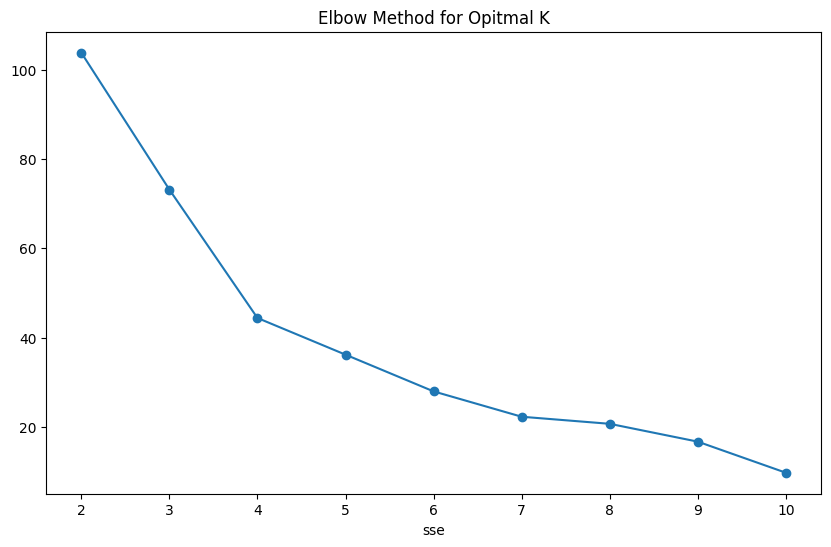

In [27]:
## 최적의 K값 찾는 방법은?
## 클러스터의 군집중심점 거리, 실루엣, 엘보우, 시각화를 통해 적정한 K를 찾기 위해 진행
sse = []
k_range = range(2,11)

for k in k_range:
    kmeans=KMeans(n_clusters= k, random_state=111)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Opitmal K')
plt.xlabel('Number of clusters')
plt.xlabel('sse')

Text(0.5, 0, 'silhouette_scores')

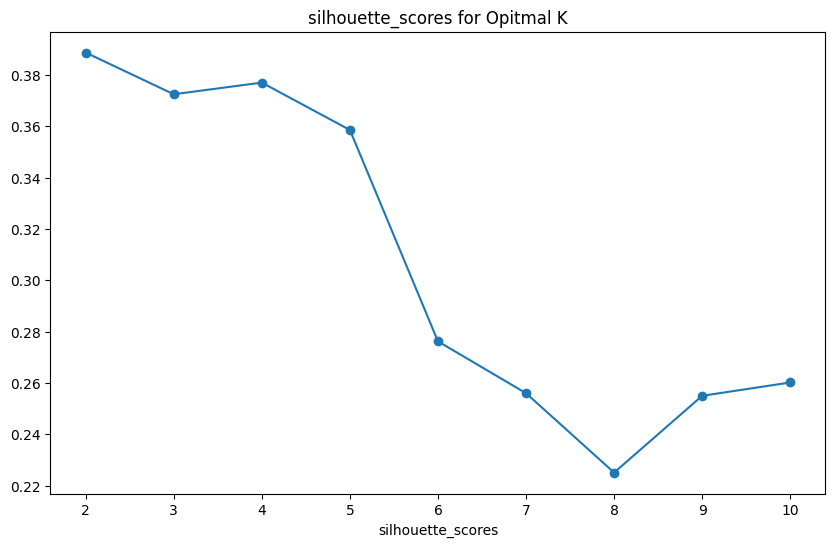

In [28]:
##실루엣 통한 최적의 K를 찾아보자!
silhouette_scores = []

for k in k_range:
    kmeans=KMeans(n_clusters= k, random_state=111)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10,6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('silhouette_scores for Opitmal K')
plt.xlabel('Number of clusters')
plt.xlabel('silhouette_scores')

In [29]:
## 군집중심점 거리에 따라 최적의 클러스터 수를 4로 한다면
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=111)
feature_matrix['cluster']=kmeans.fit_predict(X_scaled)

In [30]:
feature_matrix

,COUNT(transactions),MEAN(transactions.동승자수),MEAN(transactions.요금),MEAN(transactions.운행거리(KM)),MEDIAN(transactions.동승자수),MEDIAN(transactions.요금),MEDIAN(transactions.운행거리(KM)),SUM(transactions.동승자수),SUM(transactions.요금),SUM(transactions.운행거리(KM)),DAY(first_transactions_time),MONTH(first_transactions_time),YEAR(first_transactions_time),cluster
출발지행정동,,,,,,,,,,,,,,
포남2동,925,0.060541,1410.918919,5.994595,0.0,1100.0,3.80,56.0,1305100.0,5545.0,1,6,2024,2
송정동,204,0.078431,1282.352941,5.073039,0.0,1200.0,4.10,16.0,261600.0,1034.9,1,6,2024,1
성덕동,851,0.041128,1270.152761,4.244418,0.0,1100.0,2.70,35.0,1080900.0,3612.0,1,6,2024,1
중앙동,804,0.023632,1298.258706,4.774005,0.0,1100.0,3.00,19.0,1043800.0,3838.3,1,6,2024,1
옥천동,450,0.031111,1323.111111,4.848667,0.0,1100.0,2.60,14.0,595400.0,2181.9,1,6,2024,1
홍제동,642,0.021807,1290.498442,4.971340,0.0,1100.0,4.00,14.0,828500.0,3191.6,1,6,2024,1
주문진읍,343,0.072886,2142.274052,13.683090,0.0,2300.0,16.00,25.0,734800.0,4693.3,1,6,2024,0
교1동,628,0.009554,1258.439490,4.469586,0.0,1100.0,3.50,6.0,790300.0,2806.9,1,6,2024,1
강남동,420,0.069048,1359.523810,5.598810,0.0,1200.0,4.10,29.0,571000.0,2351.5,1,6,2024,1


## RFM Metrics로 고객분석 전처리 진행하기!
- Recency
    - 특정 일과 가장 최근에 주문한 일의 차이
- Frequency
    - 주문 빈도
- Monetary
    - 주문 금액
----
- 고객 세그먼트 나눌 때 대표적으로 분석하는 방법 RFM, RFM-C, RFM-D, RFM-N

----
- 고객 seg를 전처리를 통해 직접 만들 수 있다.
- 코호트 분석까지 진행 가능하다.

In [49]:
df = pd.read_excel('online_retail_II.xlsx')

In [53]:
# 거래 최종일
df['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

- 2009-12-04 ~ 2010-01-04 동안에 얼마나 재구매 하는지?

In [52]:
import datetime as dt
df['transaction_id'] = df.index
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,transaction_id
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,4
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,525456
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,525457
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,525458
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,525459


In [58]:
# 위에 선정한 3개의 컬럼

# 오늘 날짜 지정
today_date = dt.datetime(2010,12,10)

# 최근 거래일과의 차이 / 거래 빈도 / 가격
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                    'Invoice': lambda x: x.nunique(),
                                    'Price': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm.reset_index()

rfm.head()

,Customer ID,recency,frequency,monetary
0,12346.0,66,15,578.36
1,12347.0,2,2,162.95
2,12348.0,73,1,14.39
3,12349.0,42,4,899.49
4,12351.0,10,1,49.46


## RFM Scores
- 분석가가 직접 조정하여 설정 가능

In [62]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["recency"], 10, labels=[9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
    df_["frequency_score"] = pd.qcut(
        df_["frequency"].rank(method="first"), 10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    )
    df_["monetary_score"] = pd.qcut(df_["monetary"], 10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    df_["RFM_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(str)

    return df_


rfm = get_rfm_scores(rfm)
rfm

,Customer ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,12346.0,66,15,578.36,4,9,8,49
1,12347.0,2,2,162.95,9,2,5,92
2,12348.0,73,1,14.39,3,0,0,30
3,12349.0,42,4,899.49,5,5,9,55
4,12351.0,10,1,49.46,8,0,2,80
...,...,...,...,...,...,...,...,...
4378,18283.0,17,6,498.82,7,7,8,77
4379,18284.0,64,2,116.09,4,4,4,44
4380,18285.0,295,1,100.20,0,2,3,02
4381,18286.0,111,3,306.55,2,5,7,25


In [71]:
#전처리한 스코어를 가지고 태깅작업도 가능하다.

seg_map = {r'[0-3][0-3]': 'hibernating',
           r'[0-3][4-6]': 'at_Risk',
           r'[0-3][7-9]': 'cant_loose',
           r'[4-6][0-3]': 'about_to_sleep',
           r'[4-6][4-6]': 'need_attention',
           r'[4-6][7-9]': 'loyal_customers',
           r'[7-8]0': 'promising',
           r'90': 'new_customers',
           r'[7-9][1-5]': 'potential_loyalists',
           r'[7-9][6-9]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

,Customer ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,66,15,578.36,4,9,8,49,loyal_customers
1,12347.0,2,2,162.95,9,2,5,92,potential_loyalists
2,12348.0,73,1,14.39,3,0,0,30,hibernating
3,12349.0,42,4,899.49,5,5,9,55,need_attention
4,12351.0,10,1,49.46,8,0,2,80,promising


In [74]:
import squarify

In [75]:
rfm['segment'].value_counts()

segment
hibernating            1025
champions               888
at_Risk                 525
about_to_sleep          473
need_attention          451
potential_loyalists     420
loyal_customers         373
cant_loose              188
promising                31
new_customers             9
Name: count, dtype: int64

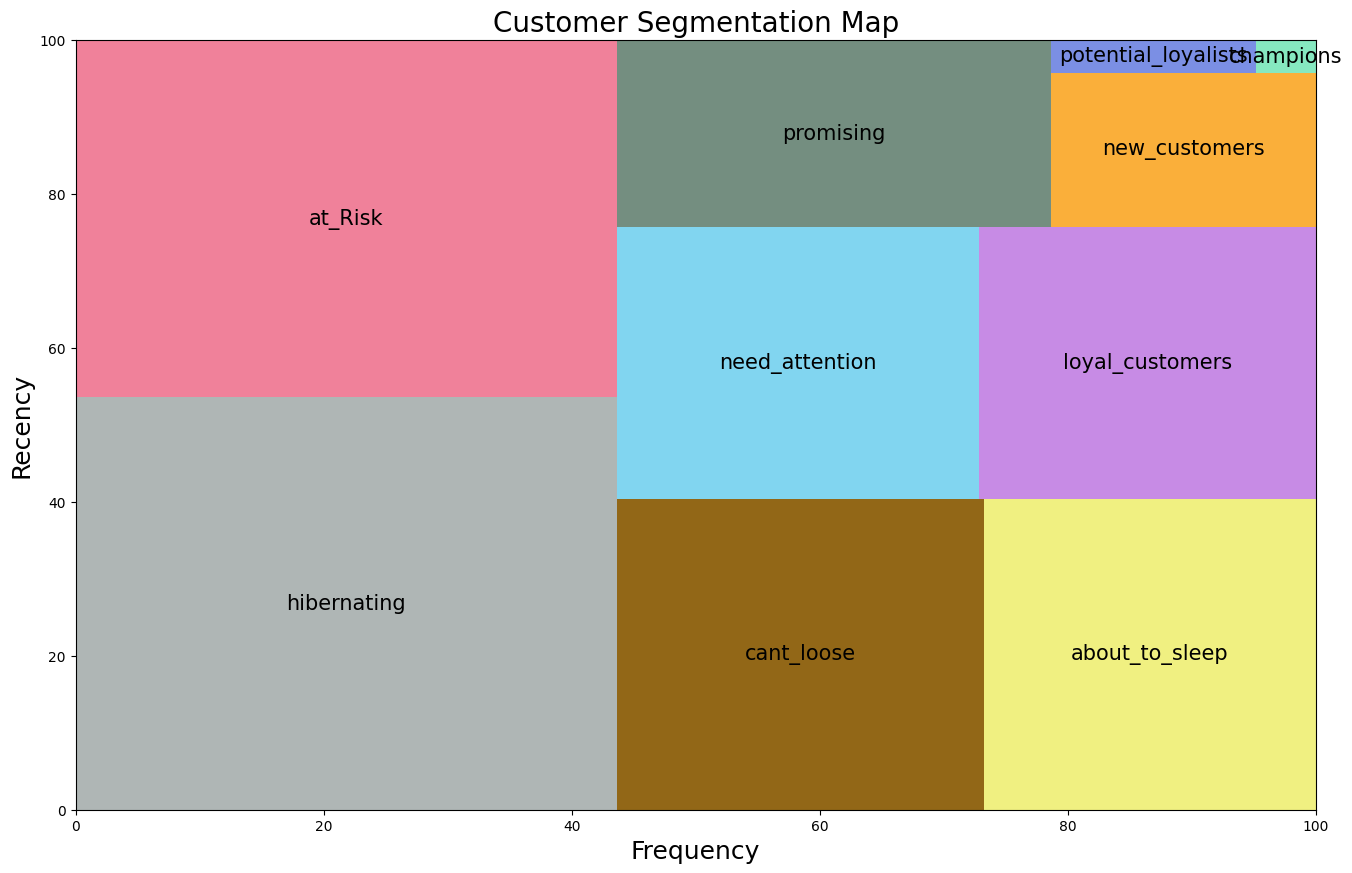

In [77]:
## 고객들의 간단한 시각화
segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)

# 크기에 따른 영역 시각화
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

In [78]:
# 통계량 확인
rfm.groupby('segment')[['recency','monetary','frequency']].agg({'mean','median','std','max','min'})

recency                                    monetary  \
                        max        std min median        mean       max   
segment                                                                   
about_to_sleep           69  13.589799  23   45.0   45.327696   1395.64   
at_Risk                 373  74.068751  70  137.0  157.241905  33628.55   
cant_loose              275  54.654502  70  108.0  127.382979   6277.08   
champions                22   6.572277   0    8.0    8.514640  40282.40   
hibernating             373  90.553819  70  213.0  214.790244  25111.09   
loyal_customers          69  13.916218  23   38.0   41.619303  39920.95   
need_attention           69  13.902773  23   42.0   43.441242   1996.51   
new_customers             6   2.403701   0    1.0    2.444444    187.72   
potential_loyalists      22   6.667556   0   13.0   11.738095    631.33   
promising                22   5.199669   7   16.0   15.354839    329.34   

                                                            frequency  \
                             std   min   median        mean       max   
segment                                                                 
about_to_sleep        114.879055  0.42   69.950   99.294630         2   
at_Risk              2063.592933  2.67  130.800  323.357200         5   
cant_loose            756.401866  3.54  293.075  486.719048        53   
champions            2059.268864  1.92  484.015  841.980851       270   
hibernating           848.257364  0.00   54.090  126.076609         2   
loyal_customers      2275.811693  2.96  419.880  725.732097        49   
need_attention        217.379347  0.96  171.170  229.516632         5   
new_customers          56.581757  2.95   40.710   59.267778         1   
potential_loyalists   120.145947  1.06  116.740  144.768667         4   
promising              67.190591  3.45   62.980   80.559032         1   

                                                      
                           std min median       mean  
segment                                               
about_to_sleep        0.475047   1    1.0   1.342495  
at_Risk               0.942263   2    3.0   3.161905  
cant_loose            5.114704   5    7.0   8.425532  
champions            18.926770   4    9.0  13.958333  
hibernating           0.408718   1    1.0   1.211707  
loyal_customers       5.143427   5    8.0   9.627346  
need_attention        0.946679   2    3.0   3.412417  
new_customers         0.000000   1    1.0   1.000000  
potential_loyalists   0.860344   1    2.0   2.145238  
promising             0.000000   1    1.0   1.000000

## RFM시각화

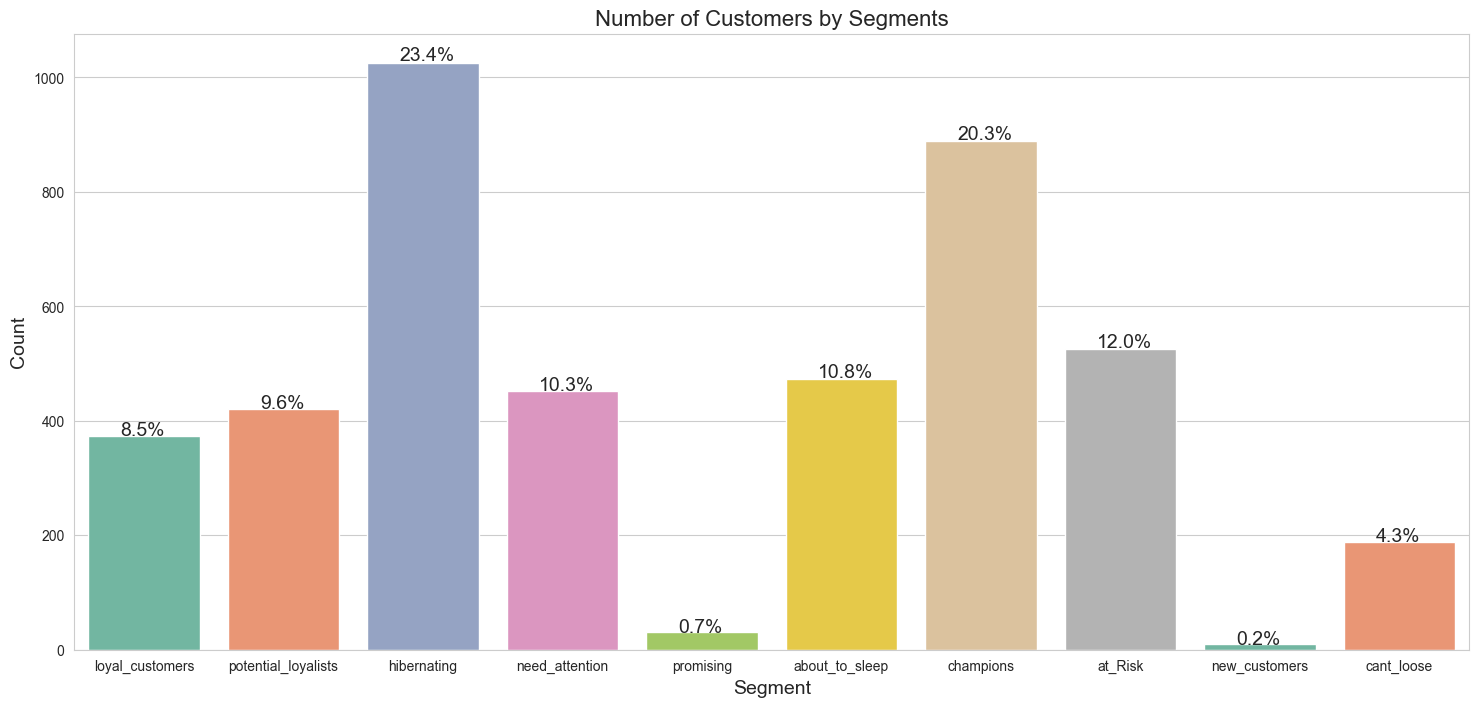

In [84]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
palette = 'Set2'

plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

<Axes: xlabel='frequency', ylabel='monetary'>

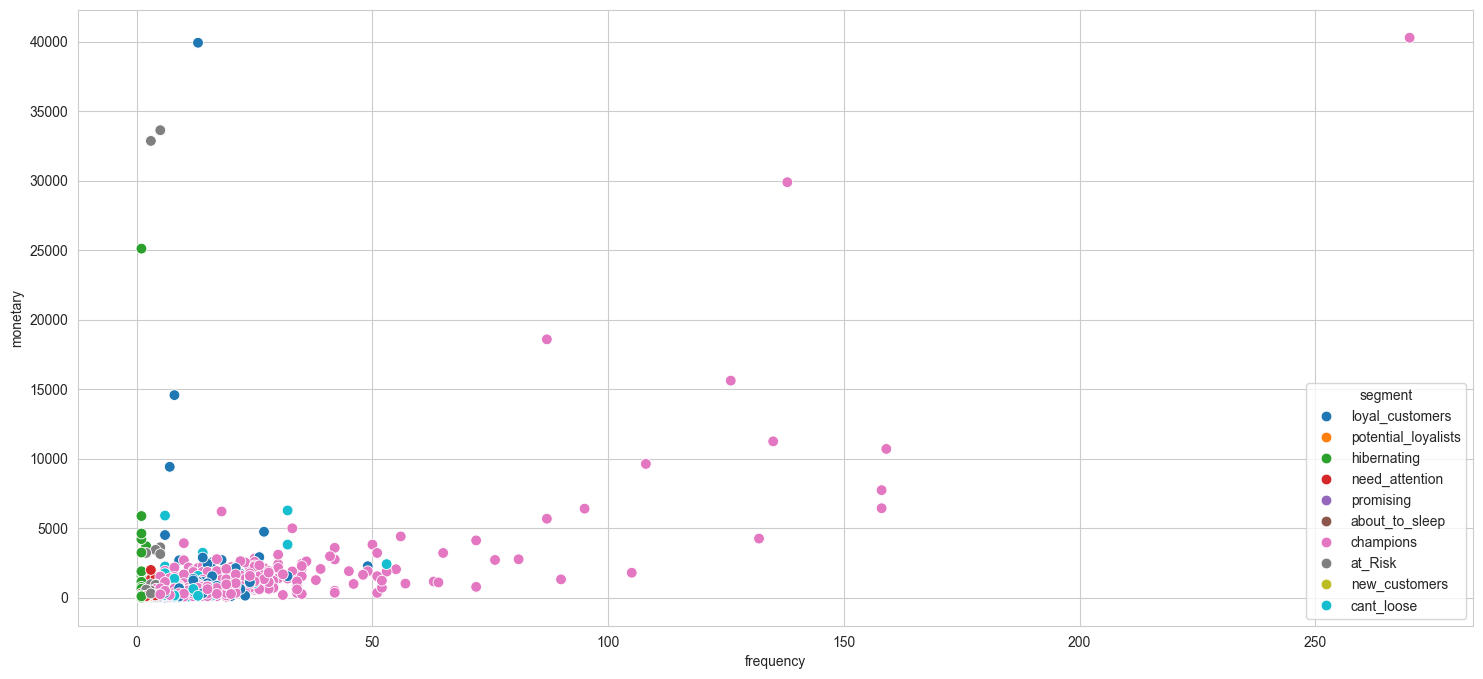

In [81]:
# 산점도로 분포 확인
plt.figure(figsize=(18,8))
sns.scatterplot(
    data=rfm, x='frequency',y='monetary',hue='segment', s=60
 )

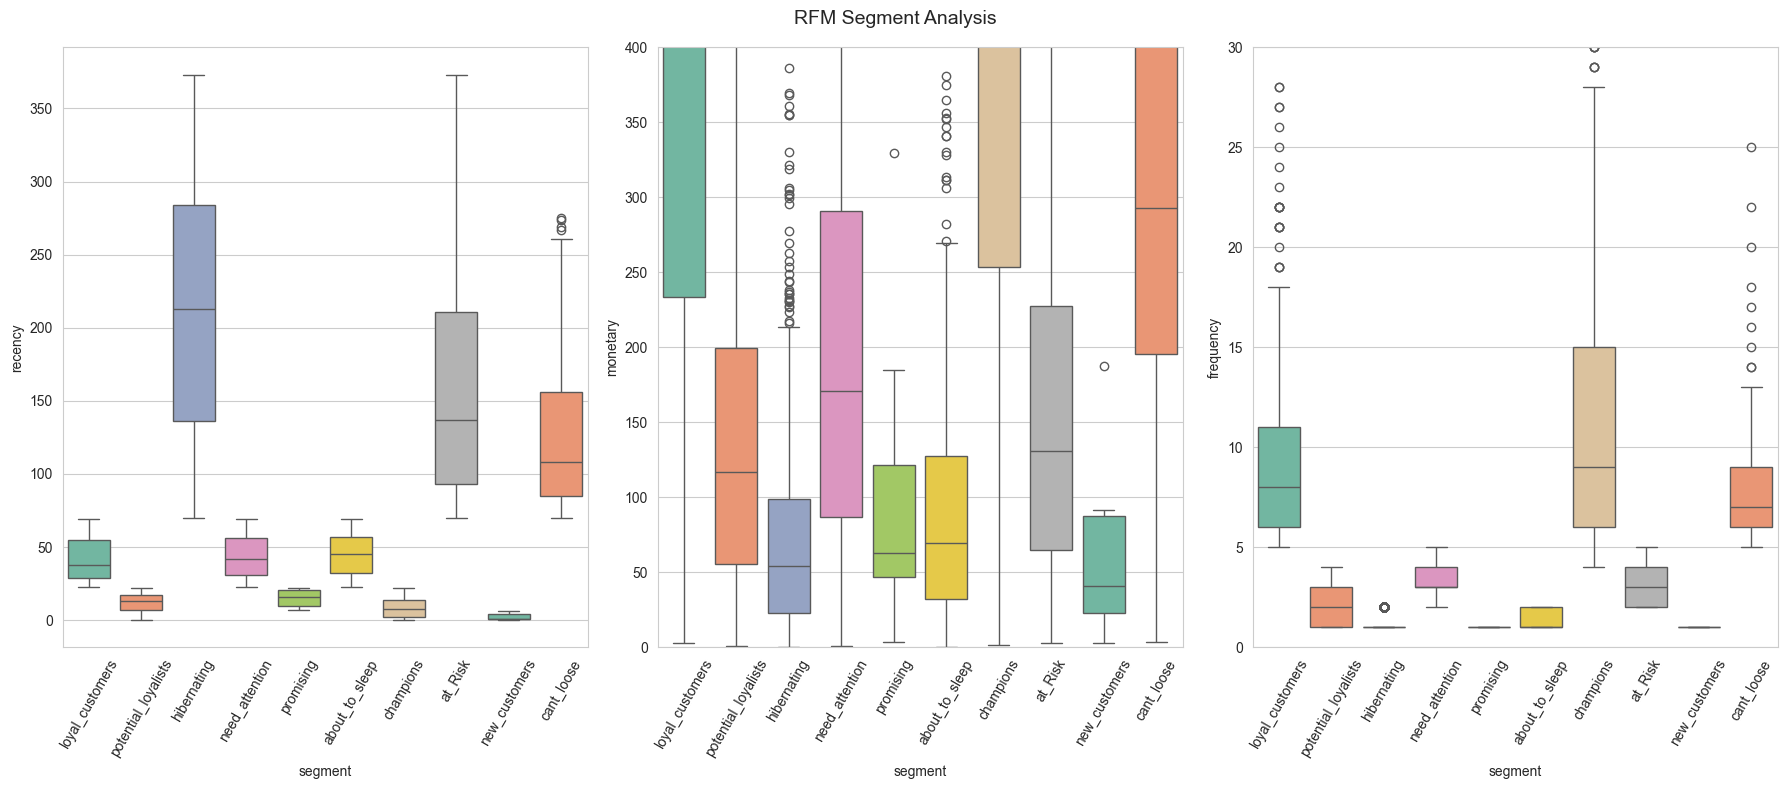

In [86]:
# "recency", "monetary", "frequency" 별로 segment의 박스플롯 관찰하기
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

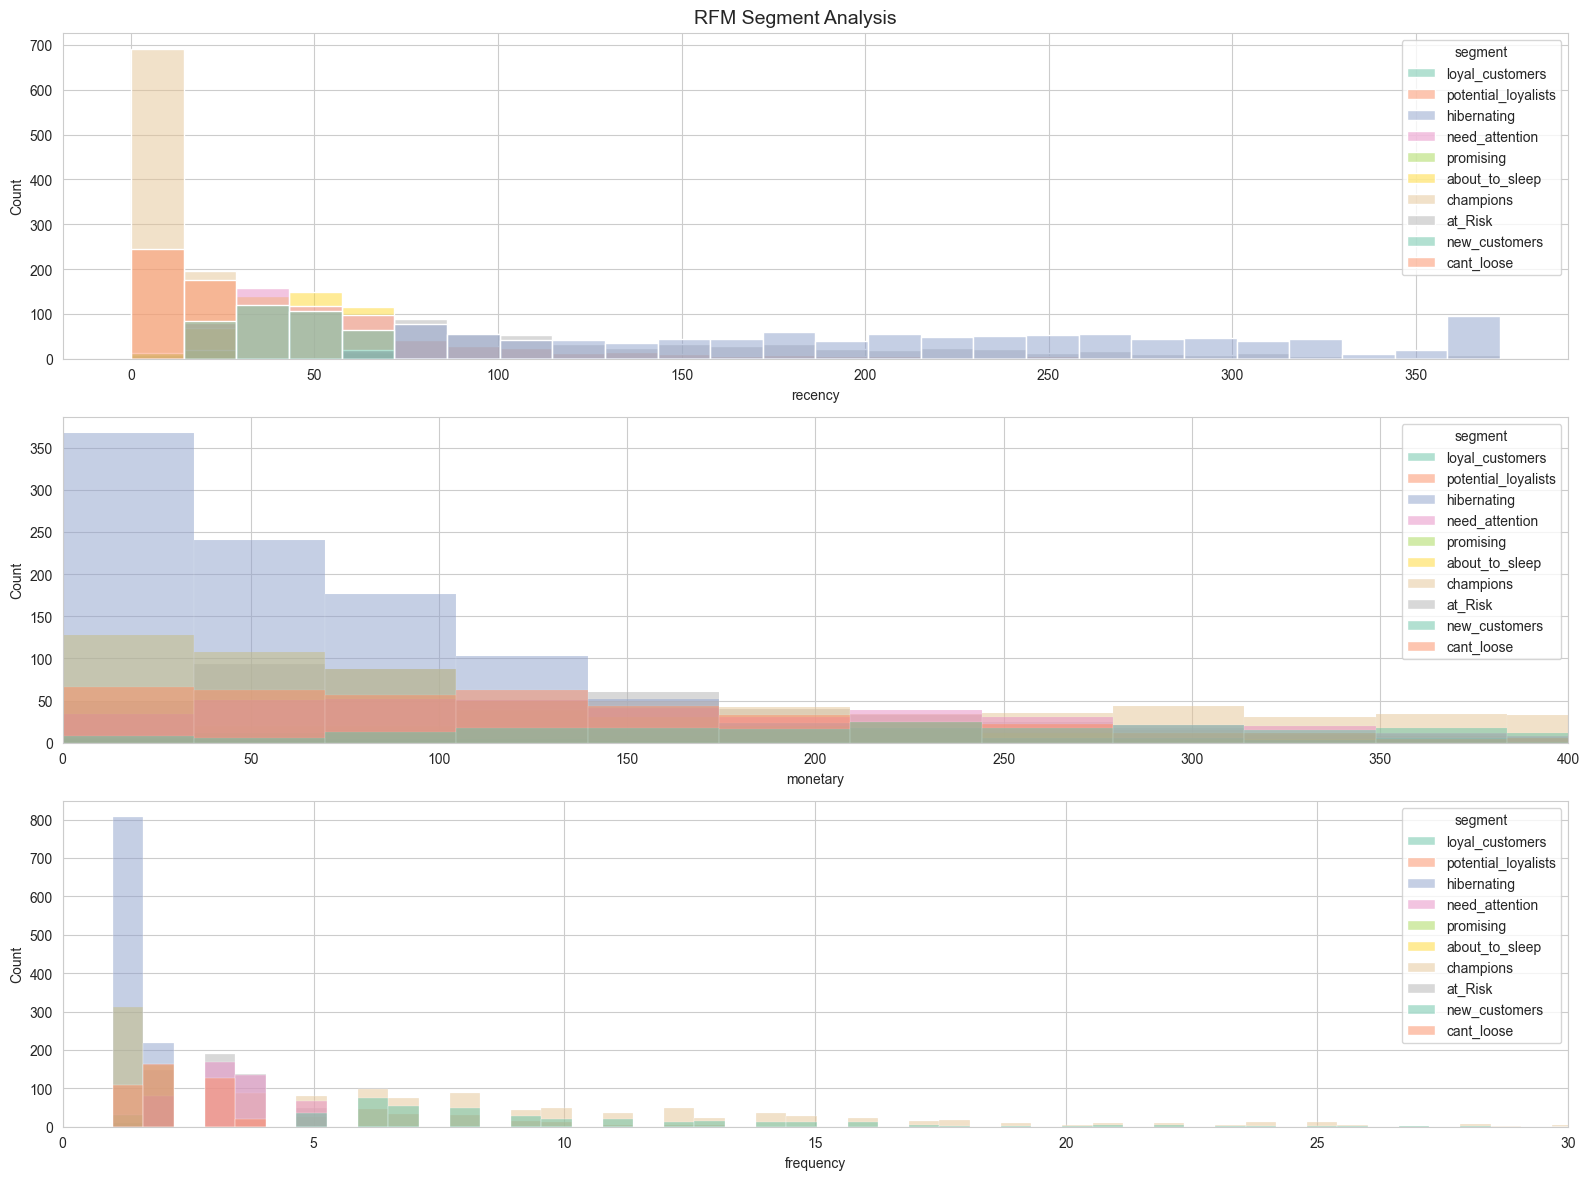

In [87]:
# 항목별로 겹쳐서 관찰하기
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()

## Cohort Analysis

In [88]:
from operator import attrgetter
import matplotlib.colors as mcolors

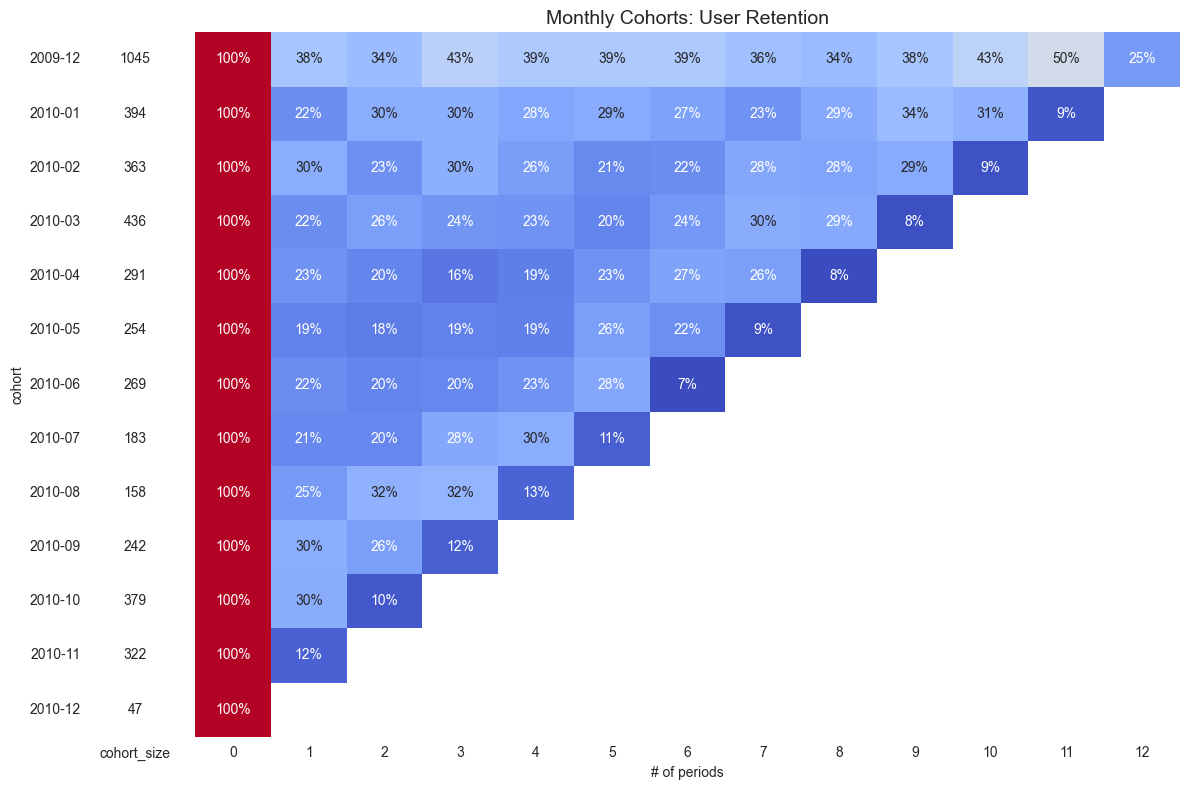

In [89]:
# 코홀트 분석
def CohortAnalysis(dataframe):

    # 입력된 데이터프레임을 복사하여 사용
    data = dataframe.copy()

    # 중복된 Customer ID, Invoice, InvoiceDate 열을 제거한 후 데이터프레임 생성
    data = data[["Customer ID", "Invoice", "InvoiceDate"]].drop_duplicates()

    # 주문 월을 계산하여 order_month 열에 추가
    data["order_month"] = data["InvoiceDate"].dt.to_period("M")

    # 각 고객이 처음 주문한 날짜의 월을 계산하여 cohort 열에 추가
    data["cohort"] = (
        data.groupby("Customer ID")["InvoiceDate"].transform("min").dt.to_period("M")
    )

    # 코호트와 주문 월별로 고객 수를 계산
    cohort_data = (
        data.groupby(["cohort", "order_month"])
        .agg(n_customers=("Customer ID", "nunique"))
        .reset_index(drop=False)
    )

    # 기간 번호를 계산하여 period_number 열에 추가
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(
        attrgetter("n")
    )

    # 피벗 테이블을 생성하여 코호트별 기간 번호에 따른 고객 수를 계산
    cohort_pivot = cohort_data.pivot_table(
        index="cohort", columns="period_number", values="n_customers"
    )

    # 각 코호트의 고객 수를 계산
    cohort_size = cohort_pivot.iloc[:, 0]

    # 유지율 매트릭스를 생성 (각 코호트별 기간 동안 남아있는 고객 비율)
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

    # 유지율을 히트맵으로 시각화
    with sns.axes_style("white"):
        fig, ax = plt.subplots(
            1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
        )

        # 고객 유지율 히트맵 그리기
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),  # 데이터가 없는 부분은 마스킹
            annot=True,  # 각 셀에 값 표시
            cbar=False,  # 컬러 바는 표시하지 않음
            fmt=".0%",  # 퍼센트 포맷
            cmap="coolwarm",  # 컬러맵 설정
            ax=ax[1],  # 두 번째 축에 그리기
        )
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)  # 그래프 제목 설정
        ax[1].set(xlabel="# of periods", ylabel="")  # x축 라벨 설정, y축 라벨은 빈칸

        # 첫 번째 축에 각 코호트의 고객 수를 히트맵으로 그리기 (하얀색 컬러맵 사용)
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(
            pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),  # 코호트 사이즈를 데이터프레임으로 변환
            annot=True,  # 각 셀에 값 표시
            cbar=False,  # 컬러 바는 표시하지 않음
            fmt="g",  # 숫자 포맷
            cmap=white_cmap,  # 하얀색 컬러맵 사용
            ax=ax[0],  # 첫 번째 축에 그리기
        )
        fig.tight_layout()  # 레이아웃 조정

CohortAnalysis(df)

- 2009년 12월에 주문한 고객의 유지율이 비교적 다른 달의 주문한 고객보다 높음
- 2010년 12월에 급겨히 유지율이 감소하는 이유는?